## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# general packages
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# sklearn models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# mne
import mne
import pickle
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)

## sklearn models

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Load preprocessed data

In [4]:
with open(os.path.join('data','Xdict.pickle'),'rb') as handle1:
    Xdict = pickle.load(handle1)
    
with open(os.path.join('data','ydict.pickle'),'rb') as handle2:
    ydict = pickle.load(handle2)

In [5]:
subjects = list(set(Xdict.keys()))

# FEATURE ENGINEERING

### Need to first make a master dataframe for the 5,6 numbers with corresponding result for all subjects compiled

In [6]:
s01 = ydict[1]
df1 = pd.DataFrame(s01, columns=['Result'])
df1['Subject'] = 1
df1['Time Series'] = Xdict[1].tolist()
df1

s02 = ydict[2]
df2 = pd.DataFrame(s02, columns=['Result'])
df2['Subject'] = 2
df2['Time Series'] = Xdict[2].tolist()
df2

s03 = ydict[3]
df3 = pd.DataFrame(s03, columns=['Result'])
df3['Subject'] = 3
df3['Time Series'] = Xdict[3].tolist()
df3

s04 = ydict[4]
df4 = pd.DataFrame(s04, columns=['Result'])
df4['Subject'] = 4
df4['Time Series'] = Xdict[4].tolist()
df4

s05 = ydict[5]
df5 = pd.DataFrame(s05, columns=['Result'])
df5['Subject'] = 5
df5['Time Series'] = Xdict[5].tolist()
df5

s06 = ydict[6]
df6 = pd.DataFrame(s06, columns=['Result'])
df6['Subject'] = 6
df6['Time Series'] = Xdict[6].tolist()
df6

s07 = ydict[7]
df7 = pd.DataFrame(s07, columns=['Result'])
df7['Subject'] = 7
df7['Time Series'] = Xdict[7].tolist()
df7

s08 = ydict[8]
df8 = pd.DataFrame(s08, columns=['Result'])
df8['Subject'] = 8
df8['Time Series'] = Xdict[8].tolist()
df8

s09 = ydict[9]
df9 = pd.DataFrame(s09, columns=['Result'])
df9['Subject'] = 9
df9['Time Series'] = Xdict[9].tolist()
df9

s10 = ydict[10]
df10 = pd.DataFrame(s10, columns=['Result'])
df10['Subject'] = 10
df10['Time Series'] = Xdict[10].tolist()


In [7]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
resultframe = pd.concat(frames)

resultframe = resultframe.reset_index().drop('index', axis=1)
resultframe

,Result,Subject,Time Series
0,Safebet,1,"[-3.7782058715820312, -3.9974231719970703, -4...."
1,Gamble,1,"[1.0019606351852417, 0.737346351146698, 0.4520..."
2,Gamble,1,"[5.230727195739746, 5.047644138336182, 4.87180..."
3,Gamble,1,"[6.716716289520264, 6.5874199867248535, 6.4329..."
4,Gamble,1,"[-4.0423502922058105, -4.200969219207764, -4.3..."
5,Gamble,1,"[-3.170818328857422, -3.543567657470703, -3.94..."
6,Safebet,1,"[-3.8998281955718994, -4.050619125366211, -4.1..."
7,Gamble,1,"[1.2145142555236816, 1.267301321029663, 1.3290..."
8,Gamble,1,"[-2.390714406967163, -2.1683504581451416, -1.9..."
9,Gamble,1,"[0.9719445705413818, 1.2123135328292847, 1.424..."


### Assuming the merged table is formed correctly, we now have our outcomes ('Results') and their corresponding first 950 time points series data, and subject information. We no longer have information regarding which electrode collected the data (irrelevant since no biological correspondence), however, if needed, we can still filter by subject as we retain that data. 

#### NOTE: This table is only for the 5,6 first number trials as it is in that scenario the patient has the ability to "Gamble". 

#### NOTE: One of the disadvantages of compiling all patient data and not separating by subject is that we are ignoring behavioral characteristics (risk aversion and risk loving) and rather finding common trends in the time series data regardless of personal characteristics.

#### NEED TO CHECK: Are all electrode data included for each patient? Is the corresponding Result matched with respective time series? Currently, I will proceed relying on the dictionary Kata made and will assume the order and correspondence is proper.

## Dataset Characteristics/Confirming master dataframe created above:

In [8]:
countframe = resultframe.groupby("Subject").count().drop('Time Series', axis=1)
countframe

,Result
Subject,
1,215
2,282
3,2832
4,150
5,2562
6,322
7,473
8,480
9,912


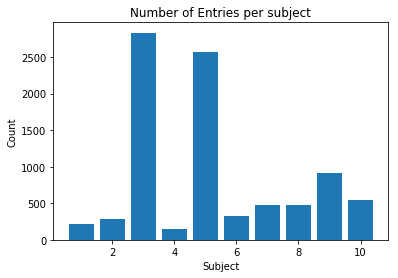

In [9]:
plt.bar(countframe.index, countframe['Result'])
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Number of Entries per subject')
plt.show();

#### Note: Number of Entries = Number of trials with first number as 5,6 * Number of electrodes for the subject

In preprocessing notebook, we determined the number of electrodes per subject to be as followed:

In [10]:
subject = [1,2,3,4,5,6,7,8,9,10]
electrodes = [5,6,59,5,61,7,11,10,19,16]
elecframe = pd.DataFrame(data={'Subject': subject, 'Num Electrode' : electrodes})
elecframe

,Subject,Num Electrode
0,1,5
1,2,6
2,3,59
3,4,5
4,5,61
5,6,7
6,7,11
7,8,10
8,9,19
9,10,16


In preprocessing notebook, we also determined the number of trials with 5 and 6 (in cleaned table, excluding all types of bad trials):

In [11]:
subject = [1,2,3,4,5,6,7,8,9,10]
num5 = [23, 24, 24, 12, 21, 22, 21, 24, 24, 16]
num6 = [20, 23, 24, 18, 21, 24, 22, 24, 24, 18]

trialframe = pd.DataFrame(data={'Subject': subject, 'Num 5': num5, 'Num 6': num6})
trialframe['Num Total Trials'] = trialframe['Num 5'] + trialframe['Num 6']
trialframe = trialframe.drop(['Num 5', 'Num 6'], axis=1)
trialframe

,Subject,Num Total Trials
0,1,43
1,2,47
2,3,48
3,4,30
4,5,42
5,6,46
6,7,43
7,8,48
8,9,48
9,10,34


Merging the two tables together:

In [12]:
confframe = pd.concat([elecframe, trialframe.drop('Subject', axis=1)], axis=1)
confframe['Expected Entries'] = confframe['Num Electrode'] * confframe['Num Total Trials']
confframe

,Subject,Num Electrode,Num Total Trials,Expected Entries
0,1,5,43,215
1,2,6,47,282
2,3,59,48,2832
3,4,5,30,150
4,5,61,42,2562
5,6,7,46,322
6,7,11,43,473
7,8,10,48,480
8,9,19,48,912
9,10,16,34,544


In [13]:
checkframe = pd.merge(confframe, countframe, how='inner', left_on='Subject', right_index=True)
checkframe

,Subject,Num Electrode,Num Total Trials,Expected Entries,Result
0,1,5,43,215,215
1,2,6,47,282,282
2,3,59,48,2832,2832
3,4,5,30,150,150
4,5,61,42,2562,2562
5,6,7,46,322,322
6,7,11,43,473,473
7,8,10,48,480,480
8,9,19,48,912,912
9,10,16,34,544,544


We now confirmed that our expected number of entries per subject matches the actual number of entries we obtained in the master dataframe created above. This indicates that the table above is likely created properly and it is safe to use it for further analysis.

Next, we need to understand the characteristics of our dataset, mainly to understand the probability of obtaining a correct prediction due to chance.

In [14]:
outframe = resultframe.groupby('Result').count().drop('Time Series', axis=1).rename(index=str, columns={'Subject':'Count'})
outframe

,Count
Result,
Gamble,4999
Safebet,3773


We can observe that the distribution is not even between the two possible outcomes so we need to be careful when assessing the performance of our model. We will next calculate the prediction power of chance:

In [15]:
total = sum(outframe['Count'])
outframe['Probability'] = outframe['Count']/total
outframe

,Count,Probability
Result,,
Gamble,4999,0.569881
Safebet,3773,0.430119


We can observe that the probability of getting a correct prediction due to purely chance is 56.988% (~57%) so we need to design a prediction model that performs better than this. We will now move on to feature engineering to create new features.

## Making new features:

In [16]:
resultframe.head()

,Result,Subject,Time Series
0,Safebet,1,"[-3.7782058715820312, -3.9974231719970703, -4...."
1,Gamble,1,"[1.0019606351852417, 0.737346351146698, 0.4520..."
2,Gamble,1,"[5.230727195739746, 5.047644138336182, 4.87180..."
3,Gamble,1,"[6.716716289520264, 6.5874199867248535, 6.4329..."
4,Gamble,1,"[-4.0423502922058105, -4.200969219207764, -4.3..."


In [17]:
resultframe['Max'] = [max(i) for i in resultframe['Time Series']]
resultframe['Min'] = [min(i) for i in resultframe['Time Series']]
resultframe['Std'] = [np.std(i) for i in resultframe['Time Series']]
resultframe['Mean'] = [np.mean(i) for i in resultframe['Time Series']]
resultframe['p2.5'] = [np.percentile(i, 2.5) for i in resultframe['Time Series']]
resultframe['p97.5'] = [np.percentile(i, 97.5) for i in resultframe['Time Series']]
resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min', 'Std', 'Mean', 'p2.5', 'p97.5', 'Result']]
resultframe.head()

,Subject,Time Series,Max,Min,Std,Mean,p2.5,p97.5,Result
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.265171,-5.901294,2.641384,-0.725729,-5.120838,5.259906,Safebet
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",8.834305,-6.981714,3.041047,-1.837577,-5.981095,6.011189,Gamble
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.990934,-5.180958,2.428461,0.113014,-4.648406,5.095333,Gamble
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",11.520736,-2.601536,3.001979,3.459670,-1.831723,10.736644,Gamble
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",8.441465,-6.694187,2.791258,-1.049202,-5.968653,5.203513,Gamble


Changing entries of "Result"

Safebet = 0, Gamble = 1:

In [18]:
resultframe['Result'] = resultframe['Result'].map({'Safebet': 0, 'Gamble': 1})
resultframe.head()

,Subject,Time Series,Max,Min,Std,Mean,p2.5,p97.5,Result
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.265171,-5.901294,2.641384,-0.725729,-5.120838,5.259906,0
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",8.834305,-6.981714,3.041047,-1.837577,-5.981095,6.011189,1
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.990934,-5.180958,2.428461,0.113014,-4.648406,5.095333,1
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",11.520736,-2.601536,3.001979,3.459670,-1.831723,10.736644,1
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",8.441465,-6.694187,2.791258,-1.049202,-5.968653,5.203513,1


We should center all our data to 0.0 since we care about relative wave form and not baseline amplitude. The difference in baseline amplitude can be ascribed to hardware differences (electrode readings) and should not be considered in our predictive model. Thus, we need to adapt our features above by centering the values around 0.0. Hence, mean is dropped as a feature and a new feature "Interval" which is max-min is introduced.

Interval = Max - Min

Percentile 2.5 and Percentile 97.5 values were determined as features above. Now, a new feature is going to be introduced "Percentile Interval" which is the difference between the two values. 

Percentile Interval = p97.5 - p2.5

In [19]:
resultframe['Max'] = resultframe['Max'] - resultframe['Mean']
resultframe['Min'] = resultframe['Min'] - resultframe['Mean']
resultframe['p2.5'] = resultframe['p2.5'] - resultframe['Mean']
resultframe['p97.5'] = resultframe['p97.5'] - resultframe['Mean']
resultframe['Mean'] = resultframe['Mean'] - resultframe['Mean']
resultframe['Interval'] = resultframe['Max'] - resultframe['Min']
resultframe['Percentile Interval'] = resultframe['p97.5'] - resultframe['p2.5']
resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min', 'Std', 'Interval', 'p2.5', 'p97.5', 'Percentile Interval', 'Result']]
resultframe

,Subject,Time Series,Max,Min,Std,Interval,p2.5,p97.5,Percentile Interval,Result
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.990900,-5.175566,2.641384,12.166465,-4.395109,5.985634,10.380744,0
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",10.671882,-5.144136,3.041047,15.816019,-4.143518,7.848766,11.992284,1
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.877920,-5.293972,2.428461,11.171892,-4.761420,4.982319,9.743739,1
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",8.061066,-6.061206,3.001979,14.122271,-5.291393,7.276974,12.568367,1
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",9.490667,-5.644985,2.791258,15.135653,-4.919451,6.252715,11.172166,1
5,1,"[-3.170818328857422, -3.543567657470703, -3.94...",6.933895,-9.552703,3.448838,16.486598,-6.355072,6.499636,12.854707,1
6,1,"[-3.8998281955718994, -4.050619125366211, -4.1...",10.137299,-5.527951,3.104352,15.665250,-4.986908,7.585611,12.572520,0
7,1,"[1.2145142555236816, 1.267301321029663, 1.3290...",12.292831,-6.559959,3.137979,18.852790,-5.090677,8.017166,13.107843,1
8,1,"[-2.390714406967163, -2.1683504581451416, -1.9...",39.404721,-9.212569,8.095704,48.617290,-8.665738,30.760217,39.425955,1
9,1,"[0.9719445705413818, 1.2123135328292847, 1.424...",9.407723,-5.973242,3.192286,15.380965,-5.683304,7.394775,13.078080,1


Since all the features currently in place are statistics that do not respect the temporal nature of our data (time-series data), we need to introduce features that also respect the morphology of the waves in the data. An example feature is number of peaks.

Number of peaks = number of data points i where i > i-1 and i > i+1 and will not include the i=0 and i=949 entries

In [20]:
peaks = []

for series in resultframe['Time Series']:
    no_peaks = 0  
    indices = range(2,949)
    for index in indices:
        if series[index] > series[index-1] and series[index] > series[index+1]:
            no_peaks += 1
    peaks.append(no_peaks)
    
len(peaks)

8772

In [21]:
resultframe['Num Peaks'] = peaks
resultframe.head()

,Subject,Time Series,Max,Min,Std,Interval,p2.5,p97.5,Percentile Interval,Result,Num Peaks
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.990900,-5.175566,2.641384,12.166465,-4.395109,5.985634,10.380744,0,16
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",10.671882,-5.144136,3.041047,15.816019,-4.143518,7.848766,11.992284,1,15
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.877920,-5.293972,2.428461,11.171892,-4.761420,4.982319,9.743739,1,20
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",8.061066,-6.061206,3.001979,14.122271,-5.291393,7.276974,12.568367,1,15
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",9.490667,-5.644985,2.791258,15.135653,-4.919451,6.252715,11.172166,1,19


In [22]:
resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min',  'Interval', 'Std', 'p2.5', 'p97.5', 'Percentile Interval', 'Num Peaks', 'Result']]
resultframe.head()

,Subject,Time Series,Max,Min,Interval,Std,p2.5,p97.5,Percentile Interval,Num Peaks,Result
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.990900,-5.175566,12.166465,2.641384,-4.395109,5.985634,10.380744,16,0
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",10.671882,-5.144136,15.816019,3.041047,-4.143518,7.848766,11.992284,15,1
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.877920,-5.293972,11.171892,2.428461,-4.761420,4.982319,9.743739,20,1
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",8.061066,-6.061206,14.122271,3.001979,-5.291393,7.276974,12.568367,15,1
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",9.490667,-5.644985,15.135653,2.791258,-4.919451,6.252715,11.172166,19,1


#### Categorizing all our data

In [23]:
resultframe['Num Peaks Cat'] = pd.cut(resultframe['Num Peaks'], 4,labels=[1,2,3,4])
resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min',  'Interval', 'Std', 'p2.5', 'p97.5', 'Percentile Interval', 'Num Peaks', 'Num Peaks Cat', 'Result']]
resultframe.head()

,Subject,Time Series,Max,Min,Interval,Std,p2.5,p97.5,Percentile Interval,Num Peaks,Num Peaks Cat,Result
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.990900,-5.175566,12.166465,2.641384,-4.395109,5.985634,10.380744,16,2,0
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",10.671882,-5.144136,15.816019,3.041047,-4.143518,7.848766,11.992284,15,2,1
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.877920,-5.293972,11.171892,2.428461,-4.761420,4.982319,9.743739,20,3,1
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",8.061066,-6.061206,14.122271,3.001979,-5.291393,7.276974,12.568367,15,2,1
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",9.490667,-5.644985,15.135653,2.791258,-4.919451,6.252715,11.172166,19,3,1


In [24]:
resultframe['p2.5 Cat'] = pd.qcut(resultframe['p2.5'], 3,labels=[1,2,3])
resultframe['p97.5 Cat'] = pd.qcut(resultframe['p97.5'], 3,labels=[1,2,3])
resultframe['Std Cat'] = pd.qcut(resultframe['Std'], 3,labels=[1,2,3])
resultframe['Percentile Interval Cat'] = pd.qcut(resultframe['Percentile Interval'], 3,labels=[1,2,3])

resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min',  'Interval', 'Std', 'p2.5', 'p97.5', 'Percentile Interval', 'Num Peaks', 'Num Peaks Cat', 'p2.5 Cat', 'p97.5 Cat', 'Std Cat', 'Percentile Interval Cat', 'Result']]
resultframe

,Subject,Time Series,Max,Min,Interval,Std,p2.5,p97.5,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat,Result
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.990900,-5.175566,12.166465,2.641384,-4.395109,5.985634,10.380744,16,2,3,1,1,1,0
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",10.671882,-5.144136,15.816019,3.041047,-4.143518,7.848766,11.992284,15,2,3,1,1,1,1
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.877920,-5.293972,11.171892,2.428461,-4.761420,4.982319,9.743739,20,3,3,1,1,1,1
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",8.061066,-6.061206,14.122271,3.001979,-5.291393,7.276974,12.568367,15,2,3,1,1,1,1
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",9.490667,-5.644985,15.135653,2.791258,-4.919451,6.252715,11.172166,19,3,3,1,1,1,1
5,1,"[-3.170818328857422, -3.543567657470703, -3.94...",6.933895,-9.552703,16.486598,3.448838,-6.355072,6.499636,12.854707,18,3,2,1,1,1,1
6,1,"[-3.8998281955718994, -4.050619125366211, -4.1...",10.137299,-5.527951,15.665250,3.104352,-4.986908,7.585611,12.572520,17,2,3,1,1,1,0
7,1,"[1.2145142555236816, 1.267301321029663, 1.3290...",12.292831,-6.559959,18.852790,3.137979,-5.090677,8.017166,13.107843,18,3,3,1,1,1,1
8,1,"[-2.390714406967163, -2.1683504581451416, -1.9...",39.404721,-9.212569,48.617290,8.095704,-8.665738,30.760217,39.425955,15,2,1,3,3,3,1
9,1,"[0.9719445705413818, 1.2123135328292847, 1.424...",9.407723,-5.973242,15.380965,3.192286,-5.683304,7.394775,13.078080,12,1,3,1,1,1,1


In [25]:
resultframe['Num Peaks Cat'] = resultframe['Num Peaks Cat'].astype(int)
resultframe['p2.5 Cat'] = resultframe['p2.5 Cat'].astype(int)
resultframe['p97.5 Cat'] = resultframe['p97.5 Cat'].astype(int)
resultframe['Std Cat'] = resultframe['Std Cat'].astype(int)
resultframe['Percentile Interval Cat'] = resultframe['Percentile Interval Cat'].astype(int)

resultframe.head()

,Subject,Time Series,Max,Min,Interval,Std,p2.5,p97.5,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat,Result
0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",6.990900,-5.175566,12.166465,2.641384,-4.395109,5.985634,10.380744,16,2,3,1,1,1,0
1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",10.671882,-5.144136,15.816019,3.041047,-4.143518,7.848766,11.992284,15,2,3,1,1,1,1
2,1,"[5.230727195739746, 5.047644138336182, 4.87180...",5.877920,-5.293972,11.171892,2.428461,-4.761420,4.982319,9.743739,20,3,3,1,1,1,1
3,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",8.061066,-6.061206,14.122271,3.001979,-5.291393,7.276974,12.568367,15,2,3,1,1,1,1
4,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",9.490667,-5.644985,15.135653,2.791258,-4.919451,6.252715,11.172166,19,3,3,1,1,1,1


### Checking our X and y matrices (selecting only features we want to pass into the model)

In [26]:
resultframe.iloc[:,[0,-1]][resultframe['Subject']==1].drop('Subject', axis=1).head()

,Result
0,0
1,1
2,1
3,1
4,1


In [53]:
resultframe.iloc[:,[0,5,8,10,11,12]][resultframe['Subject']==1].drop("Subject", axis=1).head()

,Std,Percentile Interval,Num Peaks Cat,p2.5 Cat,p97.5 Cat
0,2.641384,10.380744,2,3,1
1,3.041047,11.992284,2,3,1
2,2.428461,9.743739,3,3,1
3,3.001979,12.568367,2,3,1
4,2.791258,11.172166,3,3,1


# Modeling

## Logistic Regression

### Initialize dataframe to track model performance per subject

In [54]:
performance_logistic = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

performance_logistic

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN


### Train model

In [55]:
coefficients = dict()

# initialize dataframes to log predicted choice and true choice for each trial
predictions_logistic_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

predictions_logistic_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

LogisticRegressionModel = linear_model.LogisticRegression()

# two subclasses to start
for subject in subjects:
    print(subject)
    X = resultframe.iloc[:,[0,5,8,10,11,12]][resultframe['Subject']==subject].drop("Subject", axis=1)   
    y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
    
    # train-test split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
    
    # get naive performance (guessing most frequent category, the max of guessing one vs the other)
    performance_logistic.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    performance_logistic.loc[subject, 'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    
    # make df to track predicted vs real choice for each subject
    predictions_logistic_train = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
    predictions_logistic_test = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
        
    predictions_logistic_train['true_choice'] = ytrain['Result']
    predictions_logistic_test['true_choice'] = ytest['Result']
    
    # logistic regression
    LogisticRegressionModel.fit(Xtrain, ytrain)
    
    # store coefficients
    coefficients[subject] = LogisticRegressionModel.coef_[0]
    
    performance_logistic.loc[subject,'model_train_accuracy'] = LogisticRegressionModel.score(Xtrain,ytrain)
    performance_logistic.loc[subject,'model_test_accuracy'] = LogisticRegressionModel.score(Xtest,ytest)

    # complete the guesses for each person
    predictions_logistic_train['predicted_choice'] = LogisticRegressionModel.predict(Xtrain)
    predictions_logistic_test['predicted_choice'] = LogisticRegressionModel.predict(Xtest)
    
    # concatenate dfs
    predictions_logistic_train_master  = pd.concat([predictions_logistic_train_master, predictions_logistic_train])
    predictions_logistic_test_master  = pd.concat([predictions_logistic_test_master, predictions_logistic_test])

1
2
3
4
5
6
7
8


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

9
10


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
%matplotlib inline

### The Coefficients

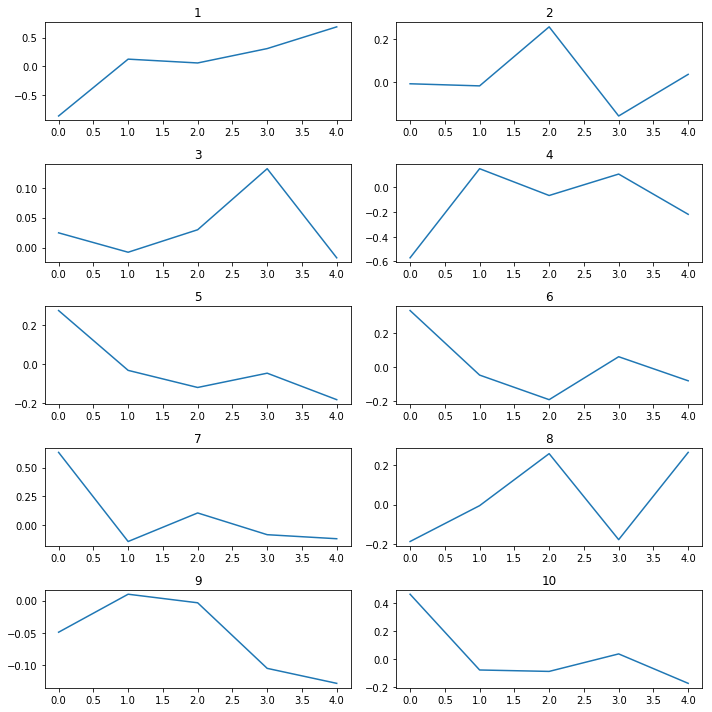

In [57]:
fig = plt.figure(figsize=[10,10])
for subject in subjects:
    ax = fig.add_subplot(5,2,subject)
    ax.set_title(subject)
    ax.plot(coefficients[subject])
plt.tight_layout()

### Plot PSD of the regression coefficients

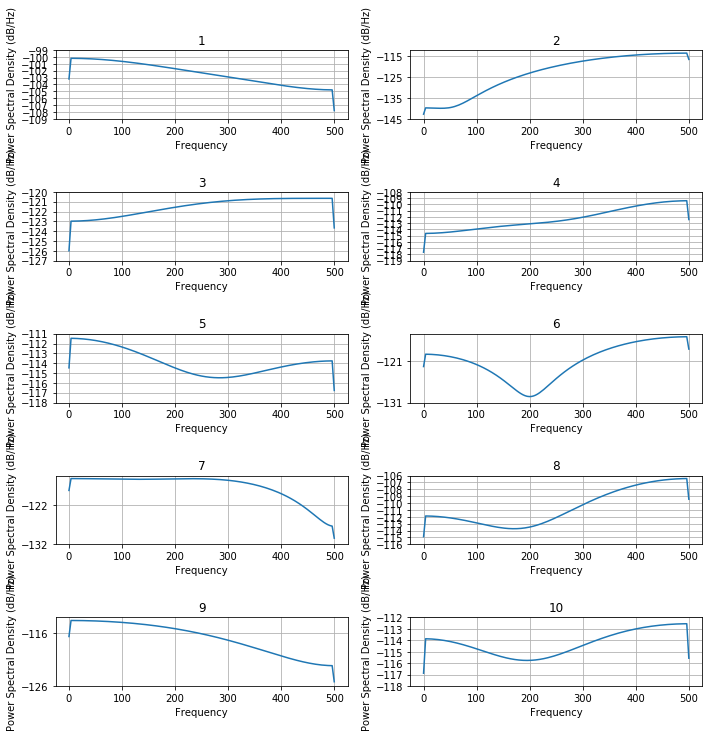

In [58]:
fig = plt.figure(figsize=[10,10])
for subject in subjects:
#     print(subject)
    ax = fig.add_subplot(5,2,subject)
    ax.set_title(subject)
    ax.psd(coefficients[subject],Fs=1000);
#     for trial in range(Xdict[subject].shape[0]):
#         ax.psd(Xdict[subject][trial,:],Fs=1000);
plt.tight_layout()

### The PSD of all the trials

1
2
3
4
5
6
7
8
9
10


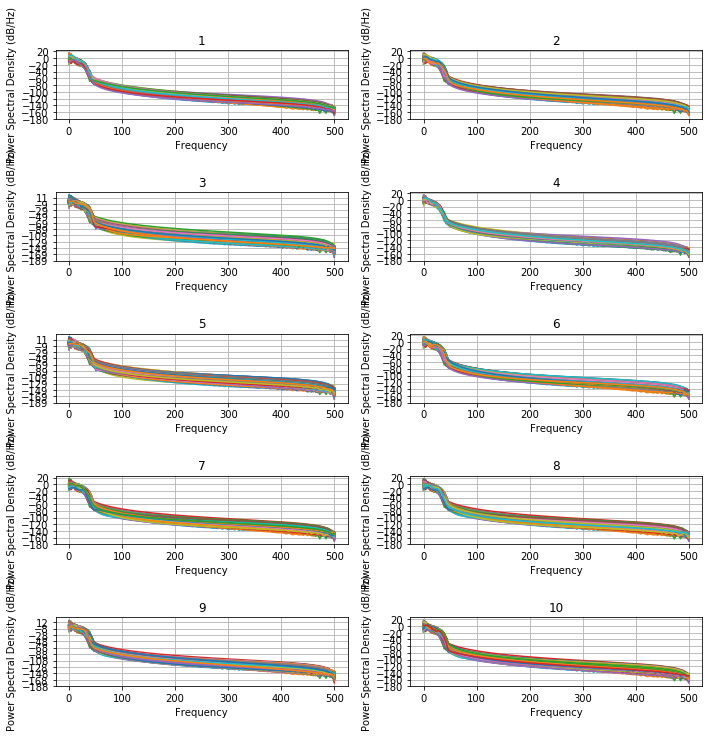

In [59]:
fig = plt.figure(figsize=[10,10])
for subject in subjects:
    print(subject)
    ax = fig.add_subplot(5,2,subject)
    ax.set_title(subject)
    for trial in range(Xdict[subject].shape[0]):
        ax.psd(Xdict[subject][trial,:],Fs=1000);
plt.tight_layout()

In [60]:
# for trial in range(Xtrain.shape[0]):
#     plt.psd(Xtrain[trial,:], Fs=1000);
#     plt.psd(Xtrain[trial,:], Fs=1000);

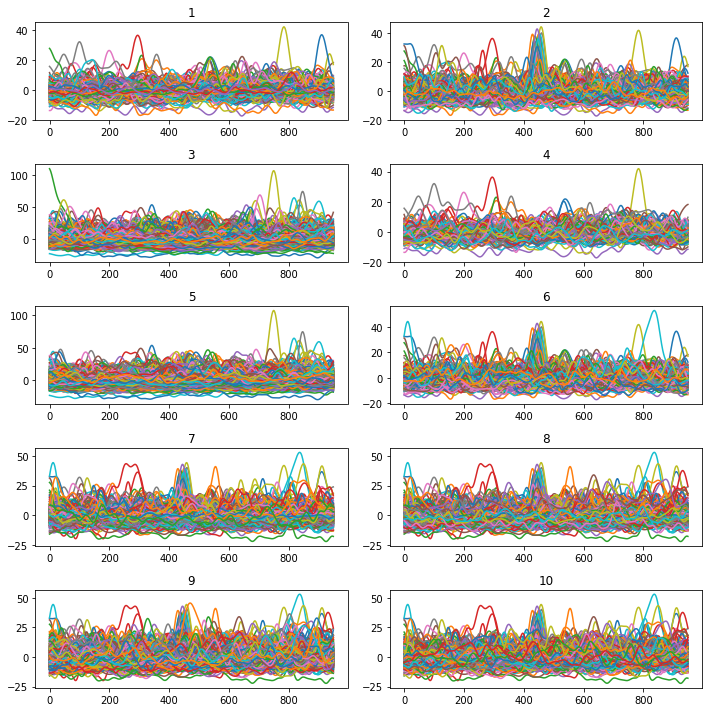

In [61]:
fig = plt.figure(figsize=[10,10])
for subject in subjects:
    ax = fig.add_subplot(5,2,subject)
    ax.set_title(subject)
    ax.plot(Xdict[subject].T)
plt.tight_layout()

In [62]:
performance_logistic

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,0,0,0.686047,0.837209
2,0,0,0.617778,0.631579
3,0,0,0.560265,0.564374
4,0,0,0.65,0.766667
5,0,0,0.759883,0.769981
6,0,0,0.525292,0.569231
7,0,0,0.838624,0.831579
8,0,0,0.580729,0.604167
9,0,0,0.622771,0.63388
10,0,0,0.528736,0.486239


In [63]:
train_accuracy_total = np.mean(predictions_logistic_train_master['true_choice'] == predictions_logistic_train_master['predicted_choice']) 
test_accuracy_total = np.mean(predictions_logistic_test_master['true_choice'] == predictions_logistic_test_master['predicted_choice'])

train_accuracy_total, test_accuracy_total

(0.6444254348445965, 0.6558589306029579)

### FEATURE SELECTION

since not much improvement has been seen in iter5, I will attempt to selectivly include features from our current feature set that demonstrates strong predictive powers. I will first see any collinear features

In [38]:
train, test = train_test_split(resultframe, test_size=0.2, random_state=100)
train_df = train.iloc[:, 2:]

train_df.head()

,Max,Min,Interval,Std,p2.5,p97.5,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat,Result
5007,14.150382,-7.451087,21.601470,4.172378,-6.328954,8.933122,15.262075,18,3,2,2,2,2,0
8410,7.227297,-5.518283,12.745581,2.505339,-4.552175,6.087747,10.639922,15,2,3,1,1,1,0
3081,15.417548,-9.650479,25.068027,5.226819,-7.420488,13.609491,21.029979,16,2,1,3,3,3,1
4005,10.351615,-7.087767,17.439383,3.334090,-4.886804,9.163159,14.049963,20,3,3,2,1,1,0
5594,10.779220,-7.715207,18.494427,3.932270,-6.308773,8.866447,15.175220,15,2,2,2,2,2,1


In [40]:
train_df.corr()

,Max,Min,Interval,Std,p2.5,p97.5,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat,Result
Max,1.000000,-0.495198,0.982302,0.876784,-0.550130,0.954165,0.931266,-0.053864,-0.049800,-0.475290,0.730184,0.682067,0.714462,0.020454
Min,-0.495198,1.000000,-0.649161,-0.721097,0.939992,-0.526810,-0.672474,0.118084,0.096884,0.813642,-0.510079,-0.653925,-0.630986,-0.029249
Interval,0.982302,-0.649161,1.000000,0.923124,-0.684318,0.948987,0.960342,-0.072619,-0.064489,-0.591553,0.749275,0.738159,0.761577,0.024214
Std,0.876784,-0.721097,0.923124,1.000000,-0.792775,0.925776,0.968003,-0.127889,-0.115076,-0.670770,0.755119,0.808339,0.784128,0.035648
p2.5,-0.550130,0.939992,-0.684318,-0.792775,1.000000,-0.591268,-0.741069,0.157254,0.132527,0.863860,-0.564231,-0.715236,-0.690121,-0.031557
p97.5,0.954165,-0.526810,0.948987,0.925776,-0.591268,1.000000,0.979661,-0.092383,-0.086297,-0.506068,0.762266,0.711385,0.746076,0.024009
Percentile Interval,0.931266,-0.672474,0.960342,0.968003,-0.741069,0.979661,1.000000,-0.116039,-0.104820,-0.636262,0.775009,0.770220,0.792853,0.027841
Num Peaks,-0.053864,0.118084,-0.072619,-0.127889,0.157254,-0.092383,-0.116039,1.000000,0.857831,0.138055,-0.101185,-0.121684,-0.126968,-0.002267
Num Peaks Cat,-0.049800,0.096884,-0.064489,-0.115076,0.132527,-0.086297,-0.104820,0.857831,1.000000,0.112732,-0.083706,-0.100667,-0.103136,-0.007596
p2.5 Cat,-0.475290,0.813642,-0.591553,-0.670770,0.863860,-0.506068,-0.636262,0.138055,0.112732,1.000000,-0.542759,-0.721654,-0.685874,-0.025034


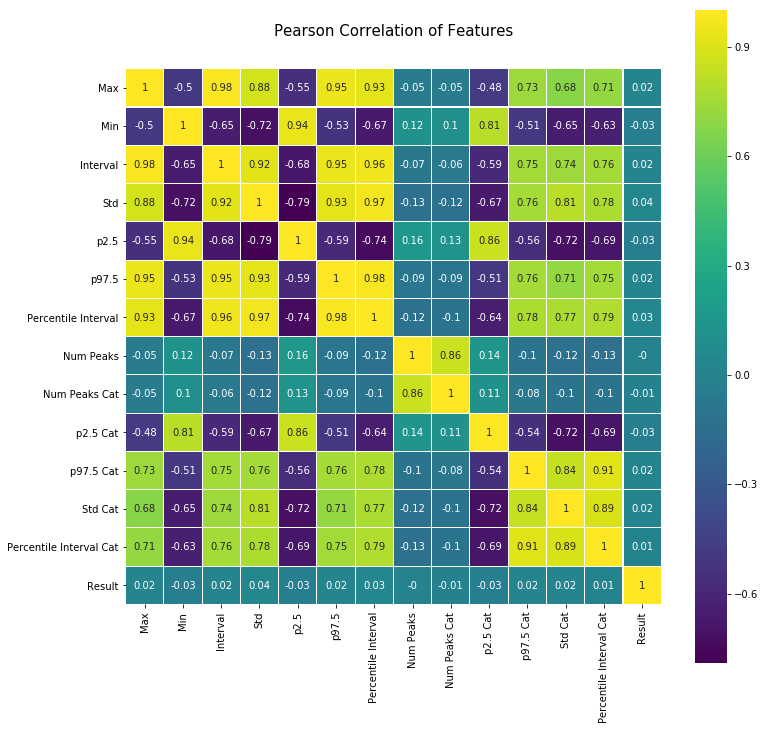

In [41]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

As seen in the chart above, the correlation between different features is generally pretty high. Thus, we need to be more selective in choosing features for this model as uncorrelated features are generally more powerful predictors

Will try these features: num peaks cat, percentile interval, std, p97.5 cat, p2.5 cat

## Random Forest

### Initialize dataframe to track model performance per subject

In [31]:
performance_forest = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

### Initialize dataframes to log predicted choice and true choice for each trial

In [32]:
feature_importances = dict()

predictions_forest_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
predictions_forest_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

random_forest = RandomForestClassifier()

# two subclasses to start
for subject in subjects:
    print(subject)
    X = resultframe.iloc[:,[0,4,6,7,8]][resultframe['Subject']==subject].drop("Subject", axis=1)   
    y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
    
    # train-test split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
    
    # get naive performance (guessing most frequent category, the max of guessing one vs the other)
    performance_forest.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    performance_forest.loc[subject,'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    
    # make df to track predicted vs real choice for each subject
    predictions_forest_train = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
    predictions_forest_test = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
        
    predictions_forest_train['true_choice'] = ytrain['Result']
    predictions_forest_test['true_choice'] = ytest['Result']
    
    # model
    random_forest.fit(Xtrain, ytrain)
    performance_forest.loc[subject,'model_train_accuracy'] = random_forest.score(Xtrain,ytrain)
    performance_forest.loc[subject,'model_test_accuracy'] = random_forest.score(Xtest,ytest)
    
    # store feature importances
    feature_importances[subject] = random_forest.feature_importances_
    
    # complete the guesses for each person
    predictions_forest_train['predicted_choice'] = random_forest.predict(Xtrain)
    predictions_forest_test['predicted_choice'] = random_forest.predict(Xtest)
    
    # concatenate dfs
    predictions_forest_train_master  = pd.concat([predictions_forest_train_master, predictions_forest_train])
    predictions_forest_test_master  = pd.concat([predictions_forest_test_master, predictions_forest_test])

1
2
3
4
5
6
7
8
9
10


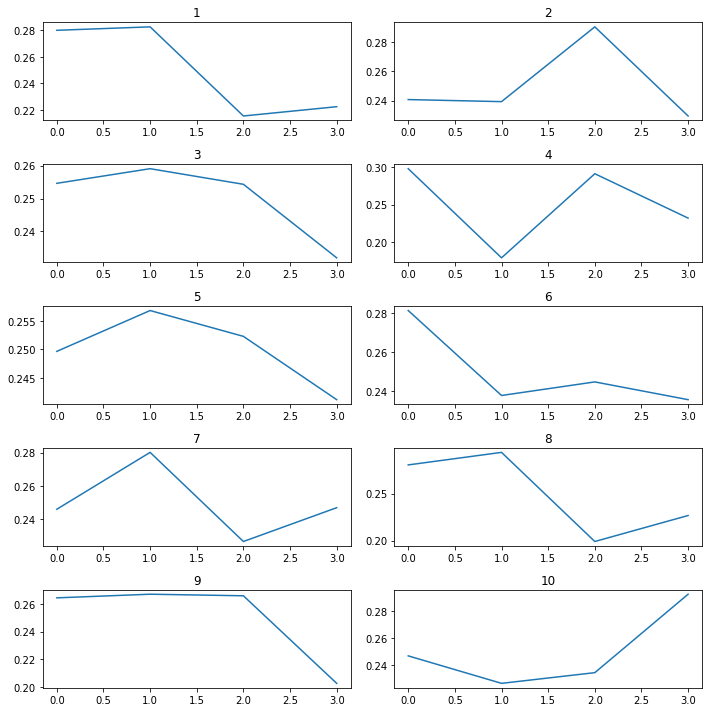

In [33]:
fig = plt.figure(figsize=[10,10])
for subject in subjects:
    ax = fig.add_subplot(5,2,subject)
    ax.set_title(subject)
    ax.plot(feature_importances[subject])
plt.tight_layout()

In [34]:
#a = plt.psd(LogisticRegressionModel.coef_[0], Fs=1000);

In [35]:
Xtrain.shape

(435, 4)

In [36]:
Xtrain.shape

(435, 4)

In [37]:
#for trial in range(Xtrain.shape[0]):
#    plt.psd(Xtrain[trial,:], Fs=1000);
#    plt.psd(Xtrain[trial,:], Fs=1000);

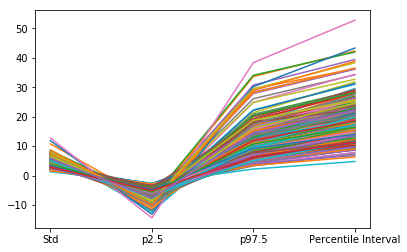

In [38]:
plt.plot(Xtrain.T);

In [39]:
performance_forest

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,0.69186,0.69186,0.976744,0.697674
2,0.613333,0.613333,0.982222,0.54386
3,0.561148,0.561148,0.973951,0.499118
4,0.641667,0.641667,0.975,0.633333
5,0.759883,0.759883,0.956076,0.725146
6,0.521401,0.521401,0.980545,0.492308
7,0.838624,0.838624,0.97619,0.757895
8,0.575521,0.575521,0.971354,0.541667
9,0.622771,0.622771,0.982167,0.584699
10,0.501149,0.501149,0.956322,0.587156


In [40]:
train_accuracy_total = np.mean(predictions_forest_train_master['true_choice'] == predictions_forest_train_master['predicted_choice']) 
test_accuracy_total = np.mean(predictions_forest_test_master['true_choice'] == predictions_forest_test_master['predicted_choice'])

train_accuracy_total, test_accuracy_total

(0.969061876247505, 0.6040955631399317)

Overfits a lot

## logistic regression modified with StandardScaler(), i.e., z-scoring the data before fitting model

### initialize dataframe to track model performance per subject

In [41]:
performance_logistic = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

### initialize dataframes to log predicted choice and true choice for each trial

In [42]:
predictions_logistic_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

predictions_logistic_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

In [43]:
LogisticRegressionModel = linear_model.LogisticRegression()

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif # use f_regression for afresh feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# pipe = make_pipeline(SelectKBest(k=50), StandardScaler(), linear_model.LogisticRegressionCV())
pipe = make_pipeline(StandardScaler(), linear_model.LogisticRegressionCV())
LogisticRegressionModel = pipe

In [45]:
# two subclasses to start
for subject in subjects:
    print(subject)
    X = resultframe.iloc[:,[0,4,6,7,8]][resultframe['Subject']==subject].drop("Subject", axis=1)   
    y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
    
    # train-test split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
    
    # get naive performance (guessing most frequent category, the max of guessing one vs the other)
    performance_logistic.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    performance_logistic.loc[subject,'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    
    # make df to track predicted vs real choice for each subject
    predictions_logistic_train = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
    predictions_logistic_test = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
        
    predictions_logistic_train['true_choice'] = ytrain['Result']
    predictions_logistic_test['true_choice'] = ytest['Result']
    
    # logistic regression
    LogisticRegressionModel.fit(Xtrain, ytrain)
    performance_logistic.loc[subject,'model_train_accuracy'] = LogisticRegressionModel.score(Xtrain,ytrain)
    performance_logistic.loc[subject,'model_test_accuracy'] = LogisticRegressionModel.score(Xtest,ytest)

    # complete the guesses for each person
    predictions_logistic_train['predicted_choice'] = LogisticRegressionModel.predict(Xtrain)
    predictions_logistic_test['predicted_choice'] = LogisticRegressionModel.predict(Xtest)
    
    # concatenate dfs
    predictions_logistic_train_master  = pd.concat([predictions_logistic_train_master, predictions_logistic_train])
    predictions_logistic_test_master  = pd.concat([predictions_logistic_test_master, predictions_logistic_test])

1
2
3
4
5
6
7
8
9
10


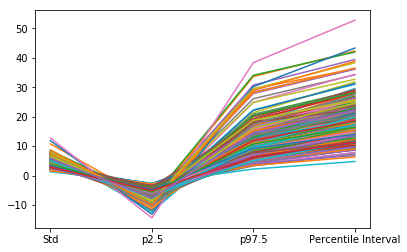

In [46]:
plt.plot(Xtrain.T);

In [47]:
performance_logistic

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,0.69186,0.69186,0.69186,0.837209
2,0.613333,0.613333,0.613333,0.631579
3,0.561148,0.561148,0.565563,0.573192
4,0.641667,0.641667,0.641667,0.766667
5,0.759883,0.759883,0.759883,0.769981
6,0.521401,0.521401,0.536965,0.538462
7,0.838624,0.838624,0.838624,0.831579
8,0.575521,0.575521,0.575521,0.614583
9,0.622771,0.622771,0.622771,0.63388
10,0.501149,0.501149,0.563218,0.541284


In [48]:
train_accuracy_total = np.mean(predictions_logistic_train_master['true_choice'] == predictions_logistic_train_master['predicted_choice']) 
test_accuracy_total = np.mean(predictions_logistic_test_master['true_choice'] == predictions_logistic_test_master['predicted_choice'])

train_accuracy_total, test_accuracy_total

(0.648274878813801, 0.661547212741752)

## logistic regression with StandardScaler() *and* selecting K best features (reducing the number of features, should reduce overfitting)

### initialize dataframe to track model performance per subject

In [49]:
performance_logistic = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

### initialize dataframes to log predicted choice and true choice for each trial

In [50]:
predictions_logistic_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

predictions_logistic_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

In [51]:
LogisticRegressionModel = linear_model.LogisticRegression()

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif # use f_regression for afresh feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#### try different numbers of num_k

In [53]:
num_k = [1,2,3,4] # max number of features is 4

for k in num_k:
    pipe = make_pipeline(SelectKBest(k=k), StandardScaler(), linear_model.LogisticRegressionCV())
    LogisticRegressionModel = pipe

    # two subclasses to start
    for subject in subjects:
        print(subject)
        X = resultframe.iloc[:,[0,4,6,7,8]][resultframe['Subject']==subject].drop("Subject", axis=1)   
        y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
        # train-test split
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)

        # get naive performance (guessing most frequent category, the max of guessing one vs the other)
        performance_logistic.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
        performance_logistic.loc[subject,'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))

        # make df to track predicted vs real choice for each subject
        predictions_logistic_train = pd.DataFrame(columns=['predicted_choice',
                                                       'true_choice'])
        predictions_logistic_test = pd.DataFrame(columns=['predicted_choice',
                                                       'true_choice'])

        predictions_logistic_train['true_choice'] = ytrain['Result']
        predictions_logistic_test['true_choice'] = ytest['Result']

        # logistic regression
        LogisticRegressionModel.fit(Xtrain, ytrain)
        performance_logistic.loc[subject,'model_train_accuracy'] = LogisticRegressionModel.score(Xtrain,ytrain)
        performance_logistic.loc[subject,'model_test_accuracy'] = LogisticRegressionModel.score(Xtest,ytest)

        # complete the guesses for each person
        predictions_logistic_train['predicted_choice'] = LogisticRegressionModel.predict(Xtrain)
        predictions_logistic_test['predicted_choice'] = LogisticRegressionModel.predict(Xtest)

        # concatenate dfs
        predictions_logistic_train_master  = pd.concat([predictions_logistic_train_master, predictions_logistic_train])
        predictions_logistic_test_master  = pd.concat([predictions_logistic_test_master, predictions_logistic_test])
    
    train_accuracy_total = np.mean(predictions_logistic_train_master['true_choice'] == predictions_logistic_train_master['predicted_choice']) 
    test_accuracy_total = np.mean(predictions_logistic_test_master['true_choice'] == predictions_logistic_test_master['predicted_choice'])
    print(k, train_accuracy_total, test_accuracy_total)

1
2
3
4
5
6
7
8
9
10
1 0.6444254348445965 0.6541524459613197
1
2
3
4
5
6
7
8
9
10
2 0.6442115768463074 0.6541524459613197
1
2
3
4
5
6
7
8
9
10
3 0.6456135348350918 0.6564277588168373
1
2
3
4
5
6
7
8
9
10
4 0.646278870829769 0.657707622298066


### Trying other models

In [54]:
X = resultframe.iloc[:,[4,6,7,8]]   
y = resultframe.iloc[:,-1]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in test data:',len(x_test))

Number of samples in training data: 7017
Number of samples in test data: 1755


In [56]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(x_train, y_train)
perceptron_train_acc = perceptron.score(x_train, y_train)
perceptron_test_acc = perceptron.score(x_test, y_test)
print ('perceptron training acuracy= ',perceptron_train_acc)
print('perceptron test accuracy= ',perceptron_test_acc)

perceptron training acuracy=  0.5703292005130398
perceptron test accuracy=  0.5675213675213675


In [57]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
adaboost_train_acc = adaboost.score(x_train, y_train)
adaboost_test_acc = adaboost.score(x_test, y_test)
print ('adaboost training acuracy= ',adaboost_train_acc)
print('adaboost test accuracy= ',adaboost_test_acc)

adaboost training acuracy=  0.5801624625908508
adaboost test accuracy=  0.5698005698005698


In [58]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_train_acc = random_forest.score(x_train, y_train)
random_forest_test_acc = random_forest.score(x_test, y_test)
print('random_forest training acuracy= ',random_forest_train_acc)
print('random_forest test accuracy= ',random_forest_test_acc)

random_forest training acuracy=  0.7383497221034631
random_forest test accuracy=  0.5287749287749288


#### ALL THREE MODELS WORSE THAN CHANCE! 